# Análise exploratória de dados
### Integrantes:
- Pedro Guilherme
- Luiz Tilio
### Tema: E-commerce
--- 
## Descrição 
Esse trabalho se propõe a realizar uma análise exploratória de dados com base nos conteúdos ministrados durante as aulas de manipulação de planilhas e estatística do Grupo de Estudos de Inteligência Artificial (GEIA). 
## Sobre o dataset

Este é um conjunto de dados transacional que contém todas as transações ocorridas entre 01/12/2010 e 09/12/2011 para um comércio varejista online sem loja física, sediado e registrado no Reino Unido. A empresa vende principalmente presentes únicos para todas as ocasiões. Muitos clientes da empresa são atacadistas.

---

In [66]:
import pandas as pd
import numpy as np

df_cru = pd.read_csv('data/data.csv', 
            sep= ',',
            encoding= 'ISO-8859-1',
            parse_dates=['InvoiceDate'],
            dtype={
                'InvoiceNo': str,
                'StockCode': str,   
                'CustomerID': str,   
            },
            na_values=['']
            )

df_cru


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [67]:
df_cru.info()
df_cru.describe(include=[float, int])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


## Análise estatística
---

In [ ]:
df_sem_nan = df_cru.dropna(axis=0, how='any')
df_sem_duplicado = df_cru.drop_duplicates(keep='first')
df_sem_qtd_neg = df_cru[df_cru['Quantity'] > 0]
df_sem_preco_neg = df_cru[df_cru['UnitPrice'] >= 0]

df_limpo = df_cru.dropna(axis=0, how='any').drop_duplicates(keep='first')
df_limpo = df_limpo[df_limpo['Quantity'] >= 0]
df_limpo = df_limpo[df_limpo['UnitPrice'] >= 0]
df_limpo = df_sem_preco_neg.reset_index(drop=True)

print(f'Total de linhas nulas: {len(df_cru) - len(df_sem_nan)}')
print(f'Total de linhas duplicadas; {len(df_cru) - len(df_sem_duplicado)}')
print(f'Total de linhas com quantidade negativa: {len(df_cru) - len(df_sem_qtd_neg)}')
print(f'Total de linhas com preço negativo: {len(df_cru) - len(df_sem_preco_neg)}')

Total de linhas nulas: 135080
Total de linhas duplicadas; 5268
Total de linhas com quantidade negativa: 10624
Total de linhas com preço negativo: 2


In [69]:
#Média de preços
media = round(df_cru['UnitPrice'].mean(), 2)

#Mediana dos preços
mediana = round(df_cru['UnitPrice'].median(), 2)

#Moda dos preços
moda = round(df_cru['UnitPrice'].mode().values[0], 2)

print("Média: ", media)
print("Mediana: ", mediana)
print("Moda: ", moda)

#Variância
variancia = round(df_cru['UnitPrice'].var(), 2)
print("Variância: ", variancia)

#Desvio padrão
desvio_padrao = round(df_cru['UnitPrice'].std(), 2)
print("Desvio padrão: ", desvio_padrao)

#Coeficiente de variação
cv = (desvio_padrao / media) * 100
print("Coeficiente de variação: ", round(cv, 2), "%")

if cv > 30:
    print("Dados heterogêneos")
else:
    print("Dados homogêneos")


#Identificando possiveis outliers
q1 = df_cru['UnitPrice'].quantile(0.25)
q3 = df_cru['UnitPrice'].quantile(0.75)
print("Q1: ", q1)
print("Q3: ", q3)
iqr = q3 - q1
print("IQR: ", iqr)
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
possiveis_outliers = df_cru[(df_cru['UnitPrice'] < limite_inferior) | (df_cru['UnitPrice'] > limite_superior)]
possiveis_outliers[['UnitPrice', 'Description']].drop_duplicates(subset='Description').sort_values(by='UnitPrice', ascending=True)


Média:  4.61
Mediana:  2.08
Moda:  1.25
Variância:  9362.47
Desvio padrão:  96.76
Coeficiente de variação:  2098.92 %
Dados heterogêneos
Q1:  1.25
Q3:  4.13
IQR:  2.88


,UnitPrice,Description
1702,8.47,JAM MAKING SET WITH JARS
6854,8.47,CHICK GREY HOT WATER BOTTLE
6902,8.47,ENAMEL WASH BOWL CREAM
6918,8.47,ALARM CLOCK BAKELIKE CHOCOLATE
6919,8.47,ALARM CLOCK BAKELIKE GREEN
...,...,...
4989,295.00,VINTAGE RED KITCHEN CABINET
1814,569.77,DOTCOM POSTAGE
222680,649.50,PICNIC BASKET WICKER 60 PIECES
299982,11062.06,Adjust bad debt


In [70]:
import statistics as stats

preco_unitario = df_cru['UnitPrice'].values
quantidade = df_cru['Quantity'].values

def media(x):
    return sum(x) / len(x)

def covariancia_amostral(x, y):
    S = 0
    n = len(x)
    media_x = media(x)
    media_y = media(y)
    for i in range(n):
        S += (x[i] - media_x) * (y[i] - media_y)
    return S / (n - 1)

print(stats.covariance(preco_unitario, quantidade))
print(covariancia_amostral(preco_unitario, quantidade))

-26.058761257926218
-26.058761257925294


In [71]:

def correlacao(x, y):
    S1 = 0
    S2 = 0
    S3 = 0
    media_x = media(x)
    media_y = media(y)

    n = len(x)
    for i in range(n):
        S1 += (x[i] - media_x) * (y[i] - media_y)
        S2 += (x[i] - media_x) ** 2
        S3 += (y[i] - media_y) ** 2
    return S1 / ((S2 ** 0.5) * (S3 ** 0.5))

print(stats.correlation(preco_unitario, quantidade))
print(correlacao(preco_unitario, quantidade))


-0.0012349245448716592
-0.0012349245448716143


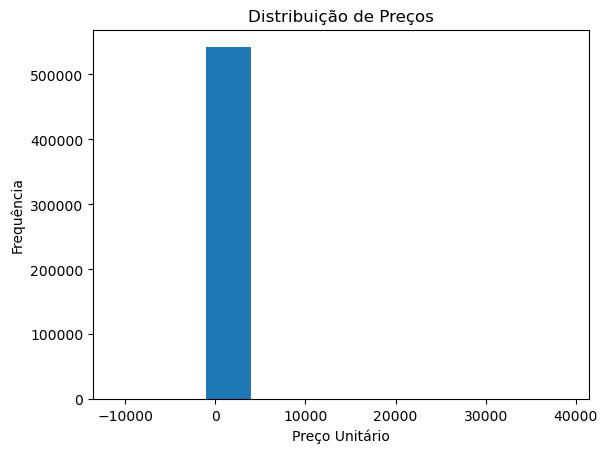

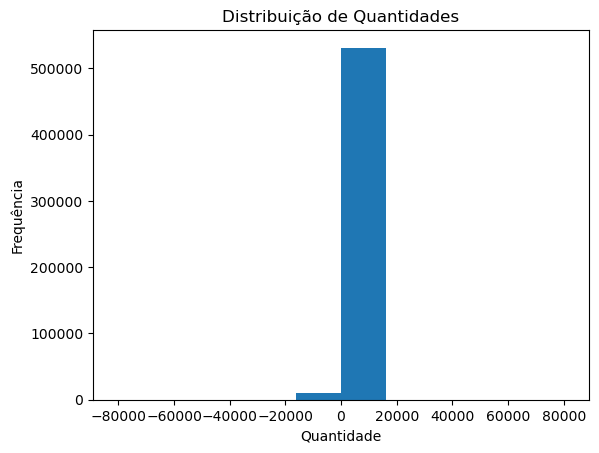

In [72]:
import matplotlib .pyplot as plt

plt.hist(df_cru['UnitPrice'])
plt.xlabel("Preço Unitário")
plt.ylabel("Frequência")
plt.title("Distribuição de Preços")
plt.show()

plt.hist(df_cru['Quantity'])
plt.xlabel("Quantidade")
plt.ylabel("Frequência")
plt.title("Distribuição de Quantidades")
plt.show()


In [73]:
df_total_col = df_cru.copy()
df_total_col = df_total_col[df_total_col['UnitPrice'] > 0]

df_total_col['Total'] = df_total_col['UnitPrice'] * df_total_col['Quantity']

def Minuscula(x):
    if isinstance(x, str):
        return x.lower()
    else:
        return x

df_total_col['Country'] = df_total_col['Country'].apply(Minuscula)

df_faturamento_pais = df_total_col.copy()
df_faturamento_pais = df_faturamento_pais.groupby('Country')['Total'].sum().reset_index()

df_faturamento_ordenado = df_faturamento_pais.sort_values(by = 'Total', axis = 0, ascending = False).reset_index(drop=True)




## Análise dos países que mais compram da Loja X
O maior comprador é o Reino Unido, onde a própria loja online foi idealizada.O faturamento durante o período analisado é de aproximadamente 8 milhões 210 mil, superando bastante até mesmo o segundo colocado que contribui com um faturamento de 284 mil. Outra observação interessante é que os países com maiores faturamentos se encontram em sua maioria no continente euroupeu apesar de existirem altos números de venda na Oceania e, em menor contribuição, nos países da Américas do norte e América do Sul.

---

In [74]:
import plotly.express as px

fig = px.choropleth(
    df_faturamento_ordenado,
    locations='Country',
    locationmode='country names',
    color='Total',
    color_continuous_scale='Reds',
    title='Mapa Cloroplético: países responsáveis pelo faturamento'
)

fig.show()

df_sem_uk = df_faturamento_ordenado[df_faturamento_ordenado['Country'] != 'united kingdom']

df_sem_uk
fig2 = px.choropleth(
    df_sem_uk,
    locations='Country',
    locationmode='country names',
    color='Total',
    color_continuous_scale='Reds',
    title='Mapa Cloroplético: países responsáveis pelo faturamento (sem Reino Unido)'

)

fig2.show()

## 10 Países que mais compram 
Os primeiros 10 maiores países que contribuem para o faturamento em evidência

In [75]:
fig = px.bar(
    df_top_10,
    x='Country',
    y='Total',
    title='Gráfico de barras: 10 países por maior faturamento',
    labels={'Country': 'País', 'Total': 'Faturamento'},
    text='Total',
    color_discrete_sequence=['#00CC96']
)
fig.show(
)
df_top_10 = df_faturamento_ordenado.head(10)
df_top_10

,Country,Total
0,united kingdom,8209930.484
1,netherlands,284661.540
2,eire,263276.820
3,germany,221698.210
4,france,197403.900
5,australia,137077.270
6,switzerland,56385.350
7,spain,54774.580
8,belgium,40910.960
9,sweden,36595.910


## Produtos mais vendidos
Ordenação decrescente de produtos mais vendidos da loja online evidenciam que o produto mais vendido seria o "world war 2 gliders asstd designs", um brinquedo de avião da segunda guerra mundial, com um total de 53847 unidades vendidas. Segue um gráfico de barras que mostram os 15 produtos mais vendidos.

In [76]:
df_tratado = df_cru.copy()

df_tratado = df_tratado.dropna(subset=['Description'])
df_tratado['Description'] = df_tratado['Description'].str.lower().str.strip()

df_produtos_mais_vendidos = df_tratado.groupby('Description')['Quantity'].sum().reset_index()
df_produtos_mais_vendidos = df_produtos_mais_vendidos.sort_values(by ='Quantity', axis=0, ascending=False)
df_produtos_mais_vendidos = df_produtos_mais_vendidos.reset_index(drop=True)

df_15_produtos_mais_vendidos = df_produtos_mais_vendidos.head(15)

fig = px.bar(
    df_15_produtos_mais_vendidos,
    x='Quantity',
    y='Description',
    title='Gráfico de barras: 15 produtos mais vendidos',
    labels={'Quantity': 'Quantidade vendida', 'Description': 'Produto'},
    text='Quantity',
    orientation='h',
    color_discrete_sequence=['#636EFA']

)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

df_15_produtos_and_price = pd.merge(df_15_produtos_mais_vendidos, 
                                    df_tratado[['Description', 'UnitPrice']],
                                    on = 'Description', 
                                    how= 'left')
df_15_produtos_and_price
df_15_produtos_mais_vendidos



,Description,Quantity
0,world war 2 gliders asstd designs,53847
1,jumbo bag red retrospot,47363
2,assorted colour bird ornament,36381
3,popcorn holder,36334
4,pack of 72 retrospot cake cases,36039
5,white hanging heart t-light holder,35317
6,rabbit night light,30680
7,mini paint set vintage,26437
8,pack of 12 london tissues,26315
9,pack of 60 pink paisley cake cases,24753


## Análise de faturamento no período analisado de um ano 

In [77]:

df_ordenado_por_data = df_total_col.sort_values(by='InvoiceDate')
df_ordenado_por_data[['InvoiceDate', 'InvoiceNo', 'Total']]


df_vendas_mes = df_total_col.groupby(pd.Grouper(key='InvoiceDate', freq='ME'))['Total'].sum().reset_index()
#df_vendas_mes['Month'] = df_vendas_mes['InvoiceDate'].dt.strftime('%b %Y')

fig = px.line(
    df_vendas_mes,
    x='InvoiceDate',
    y='Total',
    title='Gráfico de linha: Faturamento mensal entre 1/12/2010 e 9/12/2011 ',
    markers=True
)

fig.update_layout(
    xaxis_title='Mês',
    yaxis_title='Faturamento',
    title_font_size=20
)
fig.update_layout(
    xaxis=dict(
        tickformat="%b %Y",
        tickangle=45,
        dtick="M1"  # Garante um tick a cada mês
    )
)

fig.show()

df_vendas_mes

,InvoiceDate,Total
0,2010-12-31,748957.020
1,2011-01-31,560000.260
2,2011-02-28,498062.650
3,2011-03-31,683267.080
4,2011-04-30,493207.121
5,2011-05-31,723333.510
6,2011-06-30,691123.120
7,2011-07-31,681300.111
8,2011-08-31,704804.630
9,2011-09-30,1019687.622


In [78]:
faturamento = df_total_col['Total'].sum()
num_pedidos = df_total_col['InvoiceNo'].nunique()
ticket_medio = faturamento / num_pedidos
print(f'Faturamento total: {faturamento:.2f}')
print(f'Total de vendas: {num_pedidos}')
print(f'Ticket médio: {ticket_medio:.2f}')

Faturamento total: 9769872.05
Total de vendas: 23796
Ticket médio: 410.57
